In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")

In [8]:
mapdata = np.loadtxt("assets\mapdata_copyright_openstreetmap_contributors.txt")

In [9]:
mapdata.shape

(1760, 1311)

In [10]:
#Importing the predicted data
Preddata = pd.read_csv("assets\df_merged.csv")

In [11]:
#Extracting cases of present WNV
Positivecases = Preddata[Preddata["WnvPresent"] == 1]

In [15]:
spraylocations = pd.read_csv("assets\spray_data_clean.csv")

In [17]:
spraylocations["Date"] = pd.to_datetime(spraylocations["Date"])

Text(0.5, 1.0, 'Map of Chicago')

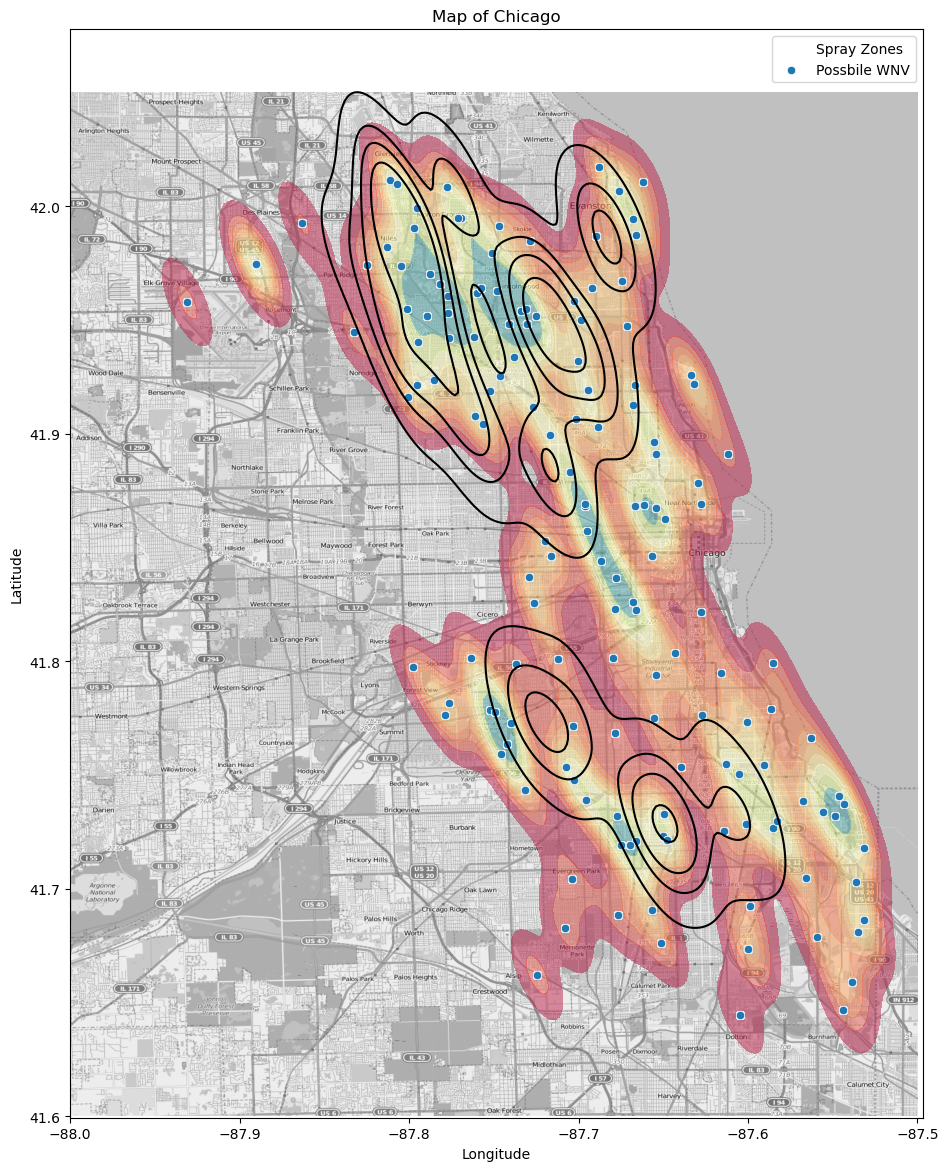

In [18]:
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.05)
plt.figure(figsize=(11,16))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)

#Plotting a kdeplot to show the bivariate disttribution of the present of WNV against the locations
sns.kdeplot(data=Preddata, x='Longitude', y='Latitude', fill=True, cmap='Spectral', alpha = 0.5)

#Overlaying with the locations of the spray to check for effectiveness
sns.kdeplot(data = spraylocations,  x = 'Longitude', y = 'Latitude', levels = 5, color  = "black", label = "Spray Zones")

#Plotting the locations of WNV present traps
sns.scatterplot(data = Positivecases, x = 'Longitude', y = 'Latitude', label = "Possbile WNV")
plt.title("Map of Chicago")

#plt.savefig("Image\MapChicago.jpg")

### Analysis of the map
1. The North area of Chicago is predicted to have high presence of WNV infected mosquitoes 
2. Possible missing spray spots such as South-East part of Chicago
3. Even with high concentration of spraying in the upper region of Chicago, it does not seem that the present of such WNV infected mosquitoes are predicted to deteriorate. Therefore we would look into the frequency of spray and possibly make a recommendation to increase it if neccessary if the benefits outweighs the cost

In [19]:
#Estimating the spray data to a degree of 1, assuming that the spray does diffuse through the air
spraylocations.Latitude = round(spraylocations.Latitude,1)
spraylocations.Longitude = round(spraylocations.Longitude,1)

In [20]:
#Finding out the days between each sprays
Timedelta = spraylocations.groupby(["Latitude","Longitude"])["Date"].apply(lambda x: x - x.min()).unique().astype("timedelta64[D]")/ np.timedelta64(1, 'D')

Text(0.5, 0, 'Days')

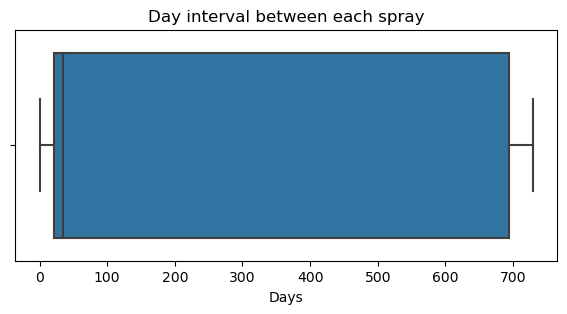

In [21]:
plt.figure(figsize=(7,3))
plt.title("Day interval between each spray")
sns.boxplot(Timedelta)
plt.xlabel("Days")
#plt.savefig("Image\Sprayinterval.jpg")

It does seem like the frequency has a wide range of values and we could see potential improvements in the WNV infected mosquitoes if we reduce the interval between each spray.

### Calculating cost of spraying 

The total land size of Chicago is at 607.4 km2 which is roughly 150,000 Acres. [(*source*)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3945683/) Since the traps in the dataset does not cover the entire land of Chicago, we would assume spraying the whole of Chicago to make sure that mosquitoes are exterminated.

The spray that is used is known as **Zenivex**, which has been approved by the Environmental Protection Agency in ths US. [(*source*)](https://news.wttw.com/2021/08/23/north-side-targeted-mosquito-spraying-risk-west-nile-virus-now-high)

The cost of using Zenivex is at 67¢ per acre to be at, therefore the total cost of spraying the \\$0.67 * 150,000 = \\$100,500.

When we consider the half life of the Zenivex spray to be at 1.5 days, [(*source*)](https://vector.sccgov.org/sites/g/files/exjcpb676/files/Zenivex%20FAQs%20June%202020.pdf) and the breeding cycle of a mosquito takes approximately 8-10 days, we would have to spray twice month to get effective results. The total cost of the sprays would be at **US$2.42 million**.


### Medical Cost of treating West Nile Virus

According to a research paper on "Initial and Long-Term Costs of Patients Hospitalized with WNV Disease" [(*source*)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3945683/), most fo the patients that are infected with WNV, they experience a range of symptoms from a fever to Acute Flaccid Paralysis (AFP) which affects the nervous system and causes muscles  to deteriorate. The cost of treating WNV are gathered in 2003 and were obtained through the direct medical charges for the hospitalization of the patients.

|Severity of Symptom|Medical Cost (USD)|Description|
|---|---|---|
|Moderate|4,467|Non-neuroinvasive disease|
|Severe|20,774|Acute Flaccid Paralysis (AFP) and speech impediment|

Additional medical cost can include follow-up visits, medication and home modifications in the case of severe neuroinvasive disease comes to an estimated additional cost of US$783

### Estimated case of West Nile Virus
During peak of the WNV in 2002, the number of reported 225 cases of cases of WNV was reported in Chicago and 22 fatality. We assume that the 22 cases have severe symptoms and need more intensive care [(*source*)](https://www.chicago.gov/content/dam/city/depts/cdph/statistics_and_reports/CDInfo_2013_JULY_WNV.pdf)

The medical cost spent on WNV: 225 * (\\$4,467 + \\$783) + 22 * \\$20,774 = US$1.64 million

### Calculating Indirect cost of WNV

The indirect cost of WNV can include such as lost of productivity which can be extrapolated by using the average income per day in Chicago which is US$200. [(*source*)](https://www.salary.com/research/company/hourly-wage-for-chicago-il).

According to a study done on the economic cost of WNV, the average patient misses 50 work days. [(*source*)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3323281/) For the fatality cases, the lifetime productivity cost is approximately US$1.2 million. [(*source*)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6688510/)

Therefore, **Total Productivity Lost** = 50 * US$200 * 225 + 22 * US\\$1.2 million = US\\$28.7 million

Total cost of WNV infections = **US$30.3 million**

### Cost Benefit Analysis

1) By simply considering the cost between spraying the whole of Chicago and the total cost due to the WNV infections, it can be concluded that spraying would be the wiser choice economically. 
2) Given that there are lives lost to this virus and possible non-reversible effects such as movement impediment, the Chicago should actively look out for any rising cases of infected WNV mosquitoes. 

## Conclusion

1. The model we selected for both predicting the breeding conditions and predicting the presence of WNV is the bagging classifier with the highest F1 score
2. With our model, we came to the conclusion that the benefits of spraying the whole of Chicago far outweighs the cost of it
3. Spraying can only deter the WNV infected mosquitoes to a certain extent. Having good practices on preventing stagnant water will aid towards breeding mosquitoes in general.